## Exploratory Analysis of Email Marketing Dataset
Data Source: [Email Campaign Management for SME](https://www.kaggle.com/loveall/email-campaign-management-for-sme)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import *
import numpy as np
import warnings
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import pickle

In [2]:
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')
sns.set()

Loading dataset

In [3]:
df = pd.read_csv("../data/Train_psolI3n.csv")
df.set_index("Email_ID", inplace=True)

Lets look at a random sample first

In [4]:
df.sample(5)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
Email_ID,,,,,,,,,,,
EMA00086597153750,1,2.3000,1,F,2,8.0000,3,520,9.0000,5.0000,0
EMA00082387284030,2,0.0000,1,NaN,3,14.0000,3,713,10.0000,0.0000,0
EMA00083136929920,1,0.1000,1,G,2,29.0000,2,763,18.0000,6.0000,0
EMA00084604908510,1,3.0000,2,G,2,40.0000,3,79,21.0000,20.0000,0
EMA00086375712630,1,2.0000,2,E,2,nan,2,366,11.0000,0.0000,1


It seems that the data is aggregated for a single user and doesnt have any time series. However there is _'Time Email Sent'_ feature.

Lets first check if the users are unqiue in records and its dimensions.

In [5]:
df.index.is_unique, df.shape

(True, (68353, 11))

We can now deduce that we have about 68k unique users with 11 features in this dataset.

Lets explore further about the features.

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Email_Type,"68,353.0000",NaN,NaN,NaN,1.2851,0.4515,1.0000,1.0000,1.0000,2.0000,2.0000
Subject_Hotness_Score,"68,353.0000",NaN,NaN,NaN,1.0955,0.9976,0.0000,0.2000,0.8000,1.8000,5.0000
Email_Source_Type,"68,353.0000",NaN,NaN,NaN,1.4565,0.4981,1.0000,1.0000,1.0000,2.0000,2.0000
Customer_Location,56758,7,G,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Email_Campaign_Type,"68,353.0000",NaN,NaN,NaN,2.2722,0.4687,1.0000,2.0000,2.0000,3.0000,3.0000
Total_Past_Communications,"61,528.0000",NaN,NaN,NaN,28.9332,12.5365,0.0000,20.0000,28.0000,38.0000,67.0000
Time_Email_sent_Category,"68,353.0000",NaN,NaN,NaN,1.9993,0.6311,1.0000,2.0000,2.0000,2.0000,3.0000
Word_Count,"68,353.0000",NaN,NaN,NaN,699.9318,271.7194,40.0000,521.0000,694.0000,880.0000,"1,316.0000"
Total_Links,"66,152.0000",NaN,NaN,NaN,10.4295,6.3833,1.0000,6.0000,9.0000,14.0000,49.0000
Total_Images,"66,676.0000",NaN,NaN,NaN,3.5507,5.5970,0.0000,0.0000,0.0000,5.0000,45.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68353 entries, EMA00081000034500 to EMA00089999316900
Data columns (total 11 columns):
Email_Type                   68353 non-null int64
Subject_Hotness_Score        68353 non-null float64
Email_Source_Type            68353 non-null int64
Customer_Location            56758 non-null object
Email_Campaign_Type          68353 non-null int64
Total_Past_Communications    61528 non-null float64
Time_Email_sent_Category     68353 non-null int64
Word_Count                   68353 non-null int64
Total_Links                  66152 non-null float64
Total_Images                 66676 non-null float64
Email_Status                 68353 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 8.8+ MB


We can see that there are N/A values for Customer_Location, Total_Past_Communications, Total_Links and Total_Images.  

The only non-numeric feature is _'Customer Location'_. Lets check how it is distributed

Text(0.5, 0, 'Number of Customers')

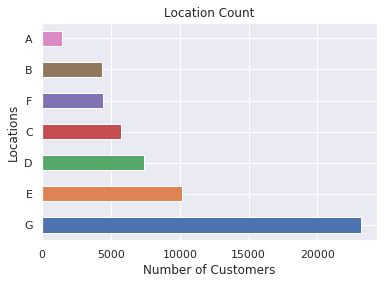

In [8]:
df.Customer_Location.dropna().value_counts().plot.barh()
plt.title("Location Count")
plt.ylabel("Locations")
plt.xlabel("Number of Customers")

The feature is categorical and we can hot encode it in the dataset.

In [9]:
df.Customer_Location = LabelEncoder().fit_transform(df.Customer_Location.astype(str))

Lets now visualize the distributions in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1aaa0390>,
      dtype=object)

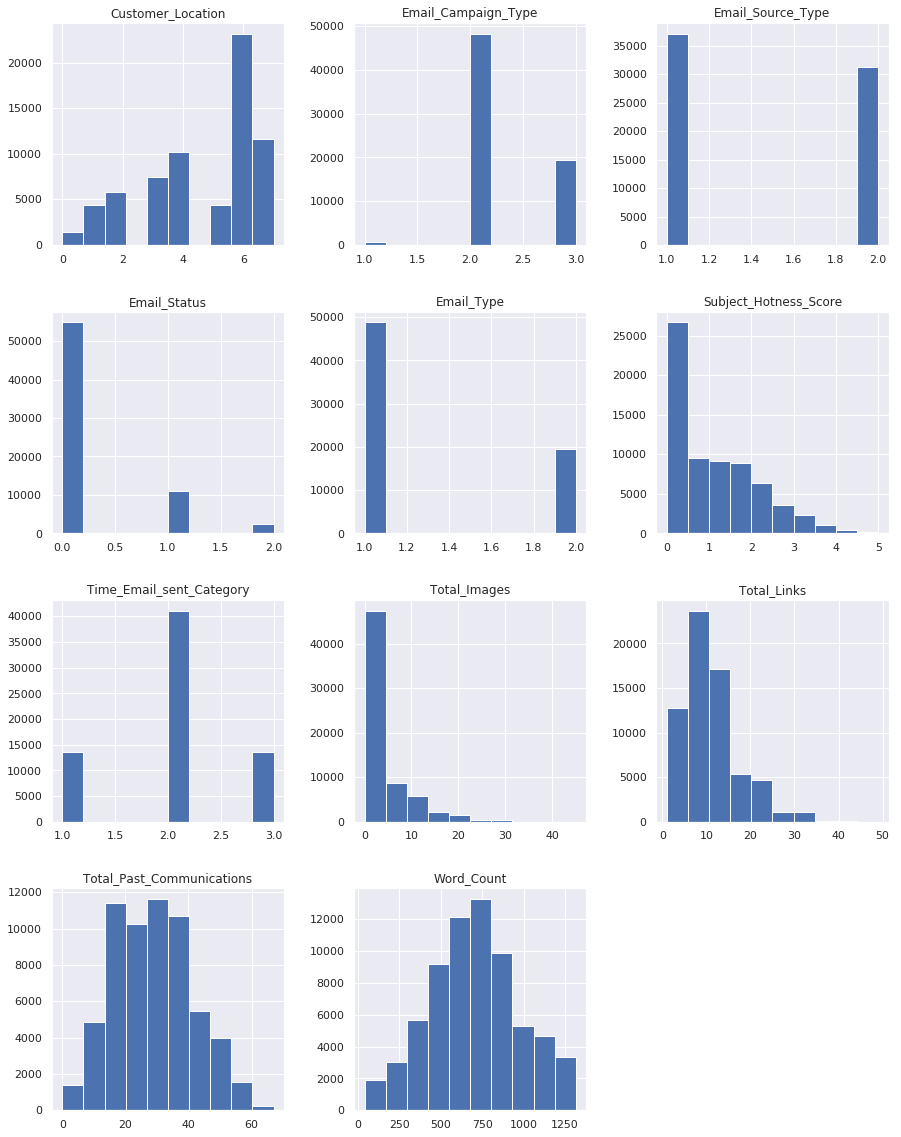

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

The above historgrams tells us that about 6 features are categorical and 'Total Past Communications' and 'Word Count' are almost normally distributed.

### Email Status

Since the source of the dataset considers _'Email Status'_ as the label column with:
- 0 - ignored
- 1 - read
- 2 - acknowledged

We will now see the proportion of these values in the dataset.

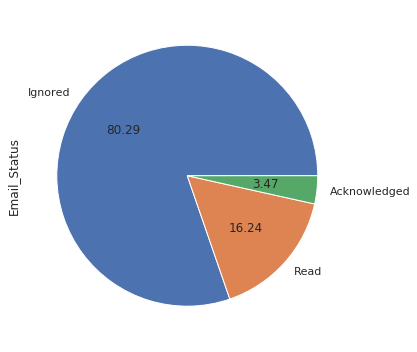

In [28]:
plt.figure(figsize=(6,6))
email_interaction_status = ["Ignored", "Read", "Acknowledged"]
df["Email_Status_label"] = df.Email_Status.map({0: email_interaction_status[0],
                    1: email_interaction_status[1],
                    2: email_interaction_status[2]})
df.Email_Status.value_counts(normalize=True).plot.pie(labels = email_interaction_status, autopct='%.2f')

As the chart shows we have a very high ratio of _ignored_ responses.

### Visualizing Pearson correlation

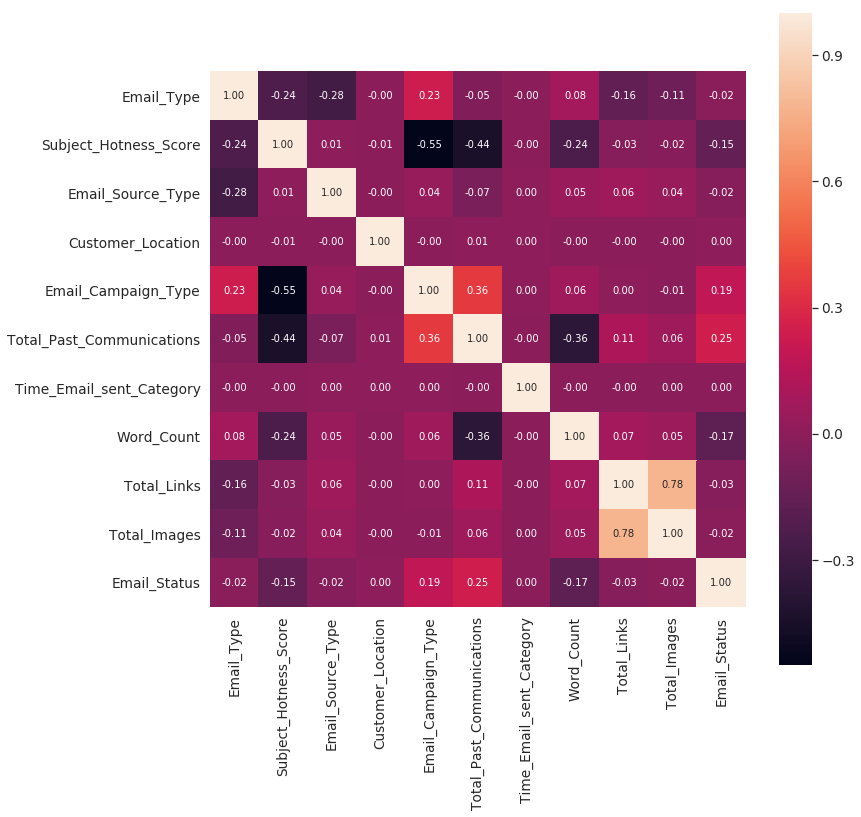

In [56]:
cor = df.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(12,12))
hm = sns.heatmap(cor, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=list(cor.columns), xticklabels=list(cor.columns))
plt.show()

Observations:
- Email_Staus (response) is co related mostly with Total_Past_Communications and Email_Campaign_Type. These two fields needs more analysis.
- Total_links and Total_images are almost related, hence we can drop one for reducing model complexity if needs be.

### Total_Past_Communications

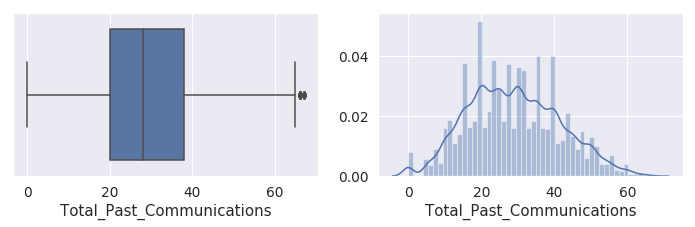

In [77]:
f, ax = plt.subplots(1, 2, figsize=(12,3))
sns.boxplot(df.Total_Past_Communications.dropna(), ax=ax[0])
sns.distplot(df.Total_Past_Communications.dropna(), ax=ax[1])

We can observe that the distirbution is mostly centered around mean and there are very few outliers.

### Past_Communications VS Email Read

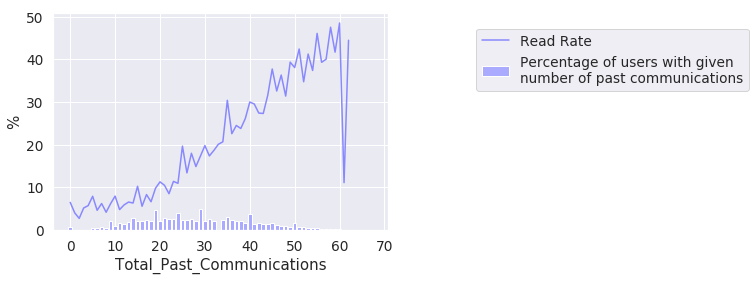

In [93]:
# Read rate per number of communications
df_sub = df.dropna(subset=['Total_Past_Communications'])
ReadVsPastComm = [len(df_sub.loc[(df_sub.Total_Past_Communications == i) & (df_sub.Email_Status == 1)]) / \
                        len(df_sub.loc[(df_sub.Total_Past_Communications == i)])*100 for i in sorted(df_sub.Total_Past_Communications.unique())[1:]]

# % of users with given number of communications 
CommPercent = [len(df_sub.loc[df_sub.Total_Past_Communications == i])/len(df_sub)*100 for i in sorted(df_sub.Total_Past_Communications.unique())[1:]]

f, ax = plt.subplots()
ax.bar(sorted(df_sub.Total_Past_Communications.unique()[1:]), CommPercent, color="#AAAAFF", label="Percentage of users with given \nnumber of past communications")
ax.plot(ReadVsPastComm, color="#8888FF", label = "Read Rate")
ax.set_xlabel("Total_Past_Communications")
ax.set_ylabel("%")
f.legend(bbox_to_anchor=(1.75,0.9))
plt.show()

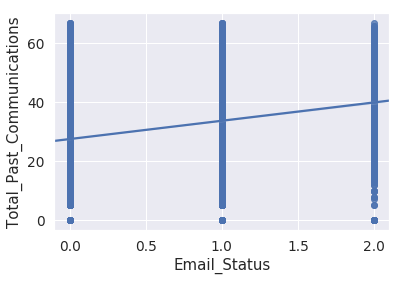

In [111]:
sns.regplot(x='Email_Status', y='Total_Past_Communications', data=df)

### Email Status VS Email_Campaign_Type 

Text(0.5, 0, 'Number of Users')

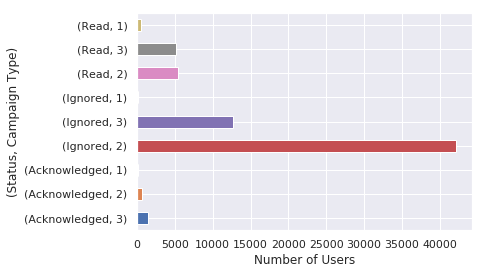

In [46]:
#plt.figure(figsize=(10,8))
df.groupby("Email_Status_label").Email_Campaign_Type.value_counts().plot.barh()
plt.ylabel("(Status, Campaign Type)")
plt.xlabel("Number of Users")

Here we can observe that Campaign 3 has resulted in most READ and ACKNOWLEDGED emails.

### Time_Email_sent_Category

Lets explore how many time categories we have and how they are distributed

Text(0.5, 0, 'Percentage')

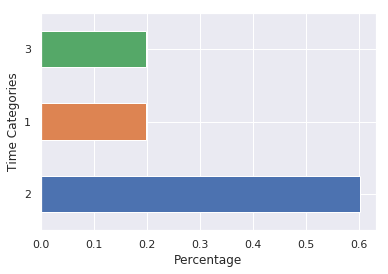

In [15]:
df.Time_Email_sent_Category.value_counts(normalize=True).plot.barh()
plt.ylabel("Time Categories")
plt.xlabel("Percentage")

We can see that 1 and 3 are each 20% wile catergory 2 covers 60% of the records. Lets check what relation they have with Email's response (Email_Status)

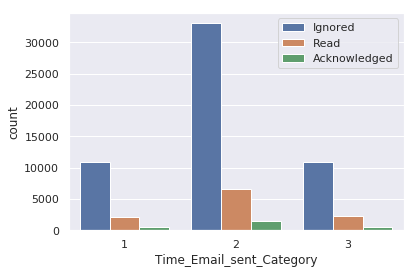

In [50]:
df['Email Response'] = df.Email_Status.map({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
fig, ax = plt.subplots()
sns.countplot(x='Time_Email_sent_Category', hue='Email_status_cat', data=df, ax=ax)
ax.legend().set_title("")

### Email Status: Time sent vs Past Communications 

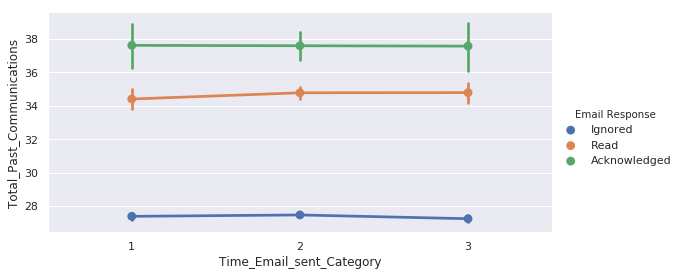

In [64]:
as1 = sns.factorplot('Time_Email_sent_Category', 'Total_Past_Communications' , hue='Email Response', size=4, aspect=2, data=df)
#plt.show()

In [60]:
plt.figure(figsize=(12,6))
fig1, ax2 = plt.subplots()
sns.factorplot('Time_Email_sent_Category', 'Total_Past_Communications' , hue='', size=4, aspect=2, data=df, ax=ax2)
ax2.legend().set_title("Email Response")
fig1.show()

### Email Status: Subject_Hotness_Score vs Past Communications 

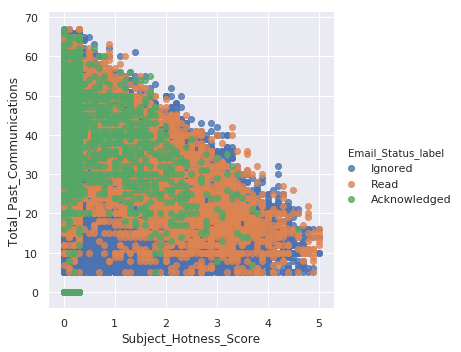

In [48]:
sns.lmplot('Subject_Hotness_Score', 'Total_Past_Communications', 
           data=df, hue='Email_Status_label', fit_reg=False)

We can see that with lower subject hotness score and higher past communications, the email's response of READ and ACKNOWLEDGE is high.

In [15]:
df.groupby("Email_Status").Time_Email_sent_Category.value_counts()#.plot.barh()

Email_Status  Time_Email_sent_Category
0             2                           33062
              1                           10970
              3                           10909
1             2                            6631
              3                            2222
              1                            2186
2             2                            1436
              1                             480
              3                             457
Name: Time_Email_sent_Category, dtype: int64

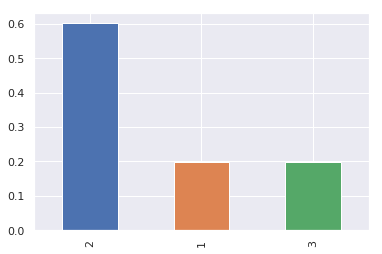

In [14]:
df.Time_Email_sent_Category.value_counts(normalize=True).plot.bar()

In [13]:
df.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

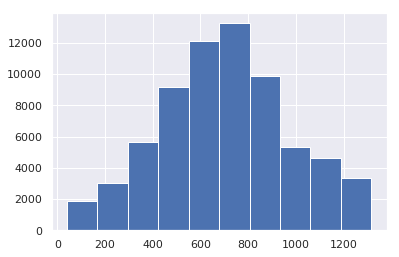

In [17]:
df.Word_Count.hist()

In [ ]:
# Read rate per number of communications
df_sub = df.dropna(subset=['Total_Past_Communications'])
ReadVsPastComm = [len(df_sub.loc[(df_sub.Total_Past_Communications == i) & (df_sub.Email_Status == 1)]) / \
                        len(df_sub.loc[(df_sub.Total_Past_Communications == i)])*100 for i in sorted(df_sub.Total_Past_Communications.unique())[1:]]

# % of users with given number of communications 
CommPercent = [len(df_sub.loc[df_sub.Total_Past_Communications == i])/len(df_sub)*100 for i in sorted(df_sub.Total_Past_Communications.unique())[1:]]

f, ax = plt.subplots()
ax.bar(sorted(df_sub.Total_Past_Communications.unique()[1:]), CommPercent, color="#AAAAFF", label="Percentage of users with given \nnumber of past communications")
ax.plot(ReadVsPastComm, color="#8888FF", label = "Read Rate")
ax.set_xlabel("Total_Past_Communications")
ax.set_ylabel("%")
f.legend(bbox_to_anchor=(1.75,0.9))
plt.show()

In [23]:
df.dropna(subset=['Total_Past_Communications']).describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,"61,528.00",1.28,0.45,1.00,1.00,1.00,2.00,2.00
Subject_Hotness_Score,"61,528.00",1.10,1.00,0.00,0.20,0.80,1.80,5.00
Email_Source_Type,"61,528.00",1.46,0.50,1.00,1.00,1.00,2.00,2.00
Email_Campaign_Type,"61,528.00",2.27,0.47,1.00,2.00,2.00,3.00,3.00
Total_Past_Communications,"61,528.00",28.93,12.54,0.00,20.00,28.00,38.00,67.00
Time_Email_sent_Category,"61,528.00",2.00,0.63,1.00,2.00,2.00,2.00,3.00
Word_Count,"61,528.00",699.73,271.81,40.00,521.00,694.00,880.00,"1,316.00"
Total_Links,"59,549.00",10.45,6.40,1.00,6.00,9.00,14.00,49.00
Total_Images,"60,007.00",3.56,5.60,0.00,0.00,0.00,5.00,45.00
Email_Status,"61,528.00",0.23,0.50,0.00,0.00,0.00,0.00,2.00


Text(0, 0.5, 'Proportion')

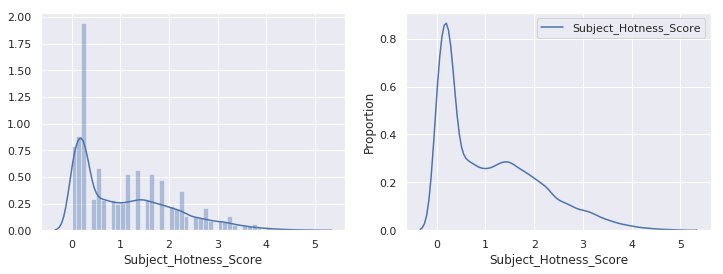

In [69]:
fg, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(df.Subject_Hotness_Score, ax=ax[0])
sns.kdeplot(df.Subject_Hotness_Score, ax=ax[1])
plt.xlabel("Subject_Hotness_Score")
plt.ylabel("Proportion")

## Implementation

In [10]:
df_org = df.copy()
df = df.dropna()

In [11]:
df['Customer_Location'] = df['Customer_Location'].astype("category").cat.codes
X = df.drop(['Email_Status'], axis=1)
Y = df['Email_Status']

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
# Features importance investigation with random forest
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.208149)
2. feature 5 (0.202968)
3. feature 8 (0.134809)
4. feature 1 (0.126786)
5. feature 9 (0.102279)
6. feature 3 (0.095816)
7. feature 4 (0.059116)
8. feature 6 (0.047455)
9. feature 2 (0.013125)
10. feature 0 (0.009497)


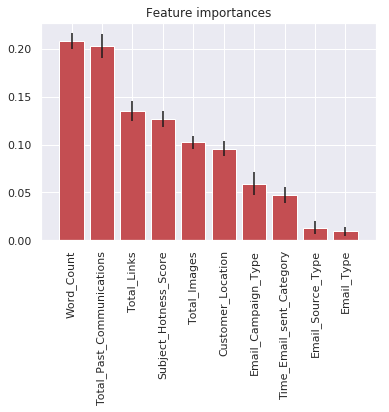

5 Most relevant features: 


array(['Word_Count', 'Total_Past_Communications', 'Total_Links',
       'Subject_Hotness_Score', 'Total_Images'], dtype=object)

In [9]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns.values[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
print("5 Most relevant features: ")
X.columns.values[indices[0:5]]

In [12]:
df['Email_Status'].value_counts(normalize=True)

0                 0.8029
1                 0.1624
2                 0.0347
Name: Email_Status, dtype: float64

In [13]:
df['Email_Status'].value_counts()

0    38772
1     7841
2     1678
Name: Email_Status, dtype: int64

In [14]:
## Oversampling Minority classes
from imblearn.over_sampling import SMOTE 
df_m = df.copy()
df_m = df_m[(df_m.Email_Status == 1) | (df_m.Email_Status == 2)]
X_m = df_m.drop(['Email_Status'], axis=1)
Y_m = df_m['Email_Status']
X = X.loc[Y[Y==0].index]
Y = Y[Y==0]
sm = SMOTE(random_state=np.random.randint(0, 100))
X_os_m , Y_os_m = sm.fit_resample(X_m, Y_m)
X_os = pd.concat([X, pd.DataFrame(X_os_m, columns= X.columns)], axis=0)
Y_os = pd.concat([Y, pd.Series(Y_os_m)], axis=0)

In [15]:
Y_os.value_counts()

0    38772
2     7841
1     7841
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_os, Y_os, 
                                                    test_size=0.3,
                                                    random_state=71, stratify=Y_os)

In [17]:
y_test.value_counts(normalize=True)

0                 0.7120
2                 0.1440
1                 0.1440
dtype: float64

### Optimization

In [18]:
from scipy.stats import uniform
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [19]:
# Classifiers
clfs = {
    'naive_bayes': MultinomialNB(),
    'svm': SVC(),
    'randomforest': RandomForestClassifier(),
    'knn': KNeighborsClassifier() 
}
#Hyperparamter search space for classifiers 
param_space = { 
    'naive_bayes': {
        'alpha': uniform(0.0, 40)
    },
   'svm': {
        'C': uniform(0, 10.0),
        'kernel': ['linear', 'rbf'],
        'gamma': uniform(0, 20.0)
    },
   'randomforest': {
        'max_depth':range(1,20),
        'max_features': range(1,5),
        'n_estimators': range(1,20),
        'criterion': ["gini", "entropy"],
        'class_weight': ['balanced']
    },
    'knn': {
        'n_neighbors': range(1,30)
    }
}		

In [ ]:
cv_history = {}
for c in clfs:
    clf = RandomizedSearchCV(clfs[c], param_space[c], random_state=1, n_iter=50, 
                             cv=3, verbose=10, n_jobs=-1, scoring='accuracy')
    best_model = clf.fit(X_os, Y_os)
    cv_history[c] = {'best_params': best_model.best_params_,
                     'mean_test_score': best_model.cv_results_['mean_test_score']
                }

In [448]:
#We ran the <i>bayes_optimization.py</i> to get the best performing classifier and its hyper parameters
# hyperopt_best = pickle.load( open( "../pickels/hyperopt_best.p", "rb" ) )
# hyperopt_hist = pickle.load( open( "../pickels/hyperopt_hist.p", "rb" ) )
# hp_hist = pd.DataFrame(hyperopt_hist, columns=["accuracy", "params"])
# hp_hist = pd.concat([pd.DataFrame(hp_hist.accuracy), pd.DataFrame(list(hp_hist.params))], axis=1)

In [20]:
acc_hist = pickle.load( open( "../pickels/cv_accuracy_hist.p", "rb" ) )

In [21]:
acc_hist_sorted = acc_hist.copy()
for classifier in acc_hist_sorted.classifier.unique():
    acc_vals = acc_hist_sorted.loc[acc_hist_sorted.classifier==classifier, 'accuracy'].sort_values()
    acc_vals.reset_index(drop=True, inplace=True)
    acc_hist_sorted.loc[acc_hist_sorted.classifier==classifier, 'accuracy'] = acc_vals

In [22]:
sns.set(rc={"lines.linewidth": 2.2})

[None, None, None, None, None, None, None, None, None, None]

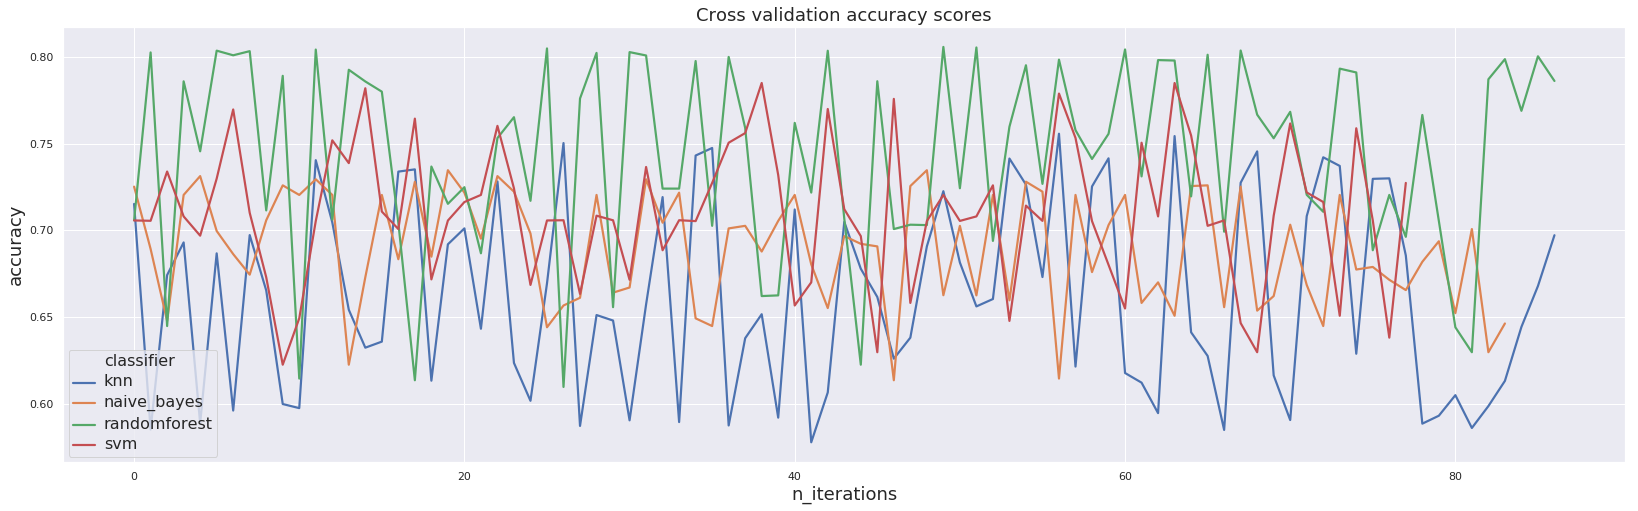

In [23]:
plt.figure(figsize=(28,8))
ax = sns.lineplot(x = 'x', y = 'accuracy', hue='classifier', data=acc_hist)
plt.xlabel('n_iterations', fontsize=18)
plt.ylabel('accuracy', fontsize=18)
plt.title("Cross validation accuracy scores", fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize='16')

Text(0.5, 1.0, 'Sorted - Cross validation accuracy scores')

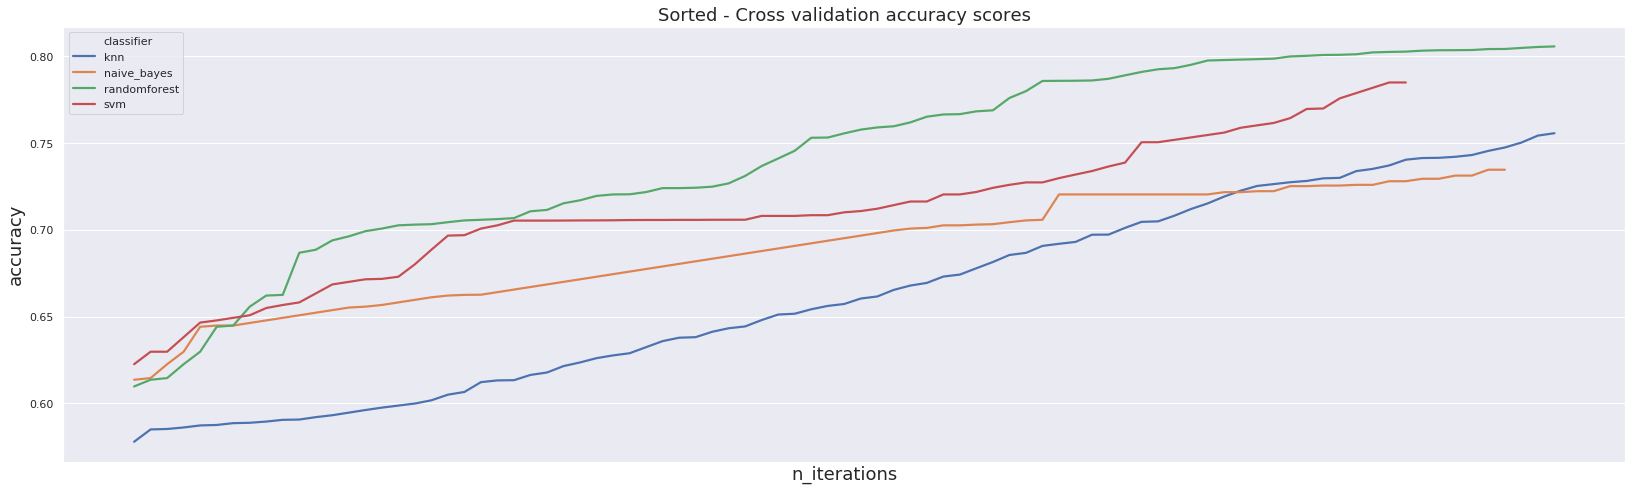

In [452]:
plt.figure(figsize=(28,8))
sns.lineplot(x = 'x', y = 'accuracy', hue='classifier', data=acc_hist_sorted)
plt.xlabel('n_iterations', fontsize=18)
plt.ylabel('accuracy', fontsize=18)
plt.xticks([])
plt.title("Sorted - Cross validation accuracy scores", fontsize=18)

Text(0.5, 1.0, 'Best Accuracy - Random Search Cross Validation')

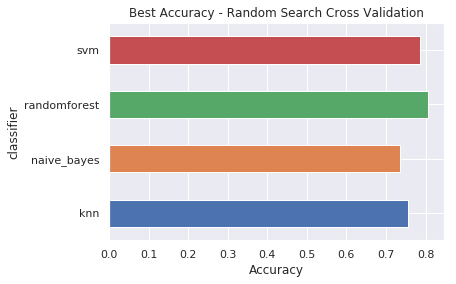

In [462]:
acc_hist.groupby("classifier").agg("max")["accuracy"].plot.barh()
plt.xlabel("Accuracy")
plt.title("Best Accuracy - Random Search Cross Validation")

## Training and Testing

SVC
Accuracy:  0.7297
Classification Report:
                precision    recall  f1-score   support

           0       0.73      1.00      0.84     11632
           1       0.69      0.00      0.01      2352
           2       0.98      0.12      0.22      2353

   micro avg       0.73      0.73      0.73     16337
   macro avg       0.80      0.37      0.35     16337
weighted avg       0.76      0.73      0.63     16337



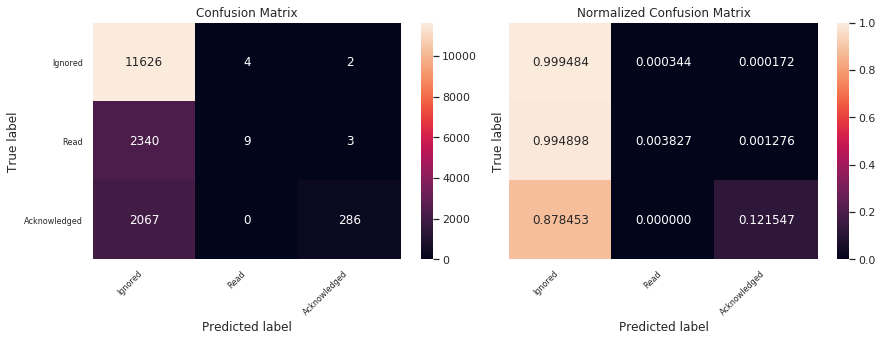

In [62]:
#SVM
from sklearn.svm import SVC  
#Best parameters from optimization (bayes_optimization.py) - see logs for details
svclassifier = SVC(kernel='rbf', C= 9.8679, gamma = 19.9878, class_weight='balanced', verbose=True)  
svclassifier.fit(X_train, y_train)  
svclassifier_predicts = svclassifier.predict(X_test)

svc_accuracy = accuracy_score(y_test, svclassifier_predicts)
print("SVC")
print("Accuracy: ", round(svc_accuracy, 4))
print("Classification Report:\n ", classification_report(y_test, svclassifier_predicts))
print_confusion_matrix(confusion_matrix(y_test, svclassifier_predicts), email_interaction_status)

Naive Bayes
Accuracy:  0.7206
Classification Report:
                precision    recall  f1-score   support

           0       0.72      1.00      0.84     11632
           1       0.64      0.01      0.02      2352
           2       0.63      0.06      0.10      2353

   micro avg       0.72      0.72      0.72     16337
   macro avg       0.66      0.36      0.32     16337
weighted avg       0.70      0.72      0.61     16337



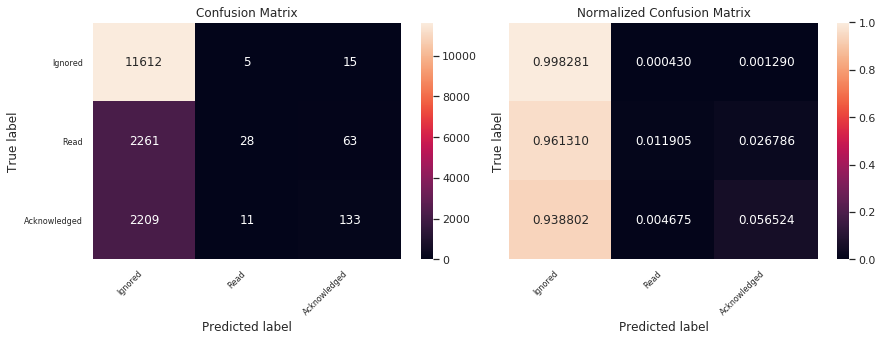

In [63]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
#Best parameters from optimization (bayes_optimization.py) - see logs for details
nbc = MultinomialNB(alpha=31.9881)
nbc.fit(X_train, y_train)
nbc_predicts = nbc.predict(X_test)

nbc_accuracy = accuracy_score(y_test, nbc_predicts)
print("Naive Bayes")
print("Accuracy: ", round(nbc_accuracy, 4))
print("Classification Report:\n ", classification_report(y_test, nbc_predicts))
print_confusion_matrix(confusion_matrix(y_test, nbc_predicts), email_interaction_status)

Random Forest Classifier
Accuracy:  0.8064
Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.91      0.88     11632
           1       0.38      0.30      0.34      2352
           2       0.92      0.78      0.85      2353

   micro avg       0.81      0.81      0.81     16337
   macro avg       0.72      0.67      0.69     16337
weighted avg       0.79      0.81      0.80     16337



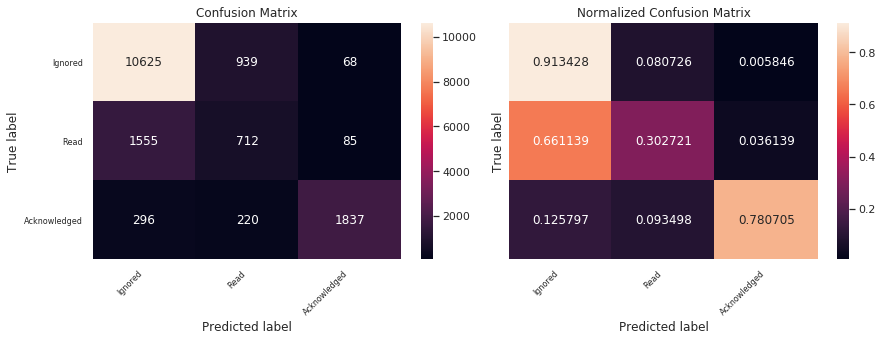

In [67]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Best parameters from optimization (bayes_optimization.py) - see logs for details
rf_params = {
    'max_depth': 19,
    'max_features': 2,
    'n_estimators': 17,
    'criterion': "gini",
    'class_weight': 'balanced'
}
rfc = RandomForestClassifier(**rf_params)
rfc.fit(X_train, y_train)
rfc_predicts = rfc.predict(X_test)

rf_accuracy = accuracy_score(y_test, rfc_predicts)
#rfc_cv_score = cross_val_score(rfc, X, Y, cv=10, scoring="roc_auc", n_jobs=-1)
print("Random Forest Classifier")
print("Accuracy: ", round(rf_accuracy, 4))
print("Classification Report:\n ", classification_report(y_test, rfc_predicts))
print_confusion_matrix(confusion_matrix(y_test, rfc_predicts), email_interaction_status)

KNeighborsClassifier
Accuracy:  0.739
Classification Report:
                precision    recall  f1-score   support

           0       0.78      0.94      0.85     11632
           1       0.43      0.03      0.06      2352
           2       0.52      0.45      0.48      2353

   micro avg       0.74      0.74      0.74     16337
   macro avg       0.57      0.47      0.46     16337
weighted avg       0.69      0.74      0.68     16337



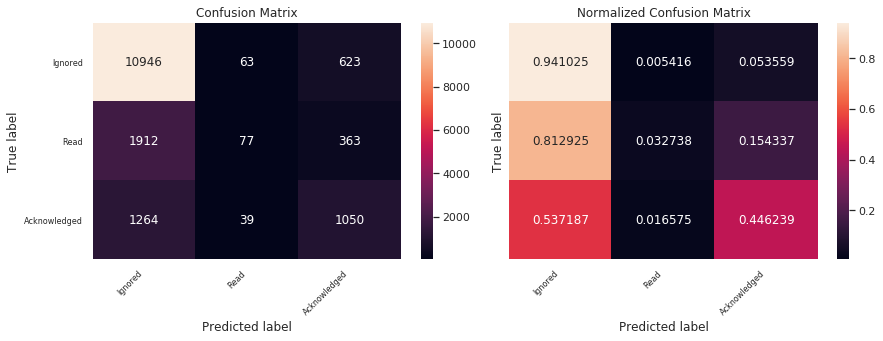

In [68]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Best parameters from optimization (bayes_optimization.py) - see logs for details
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
knn_predicts = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predicts)
print("KNeighborsClassifier")
print("Accuracy: ", round(knn_accuracy, 4))
print("Classification Report:\n ", classification_report(y_test, knn_predicts))
print_confusion_matrix(confusion_matrix(y_test, knn_predicts), email_interaction_status)

In [48]:
print("SVC F1: ", f1_score(y_test, svclassifier_predicts, average='weighted'))
print("KNN F1: ", f1_score(y_test, knn_predicts, average='weighted'))
print("RFC F1: ", f1_score(y_test, rfc_predicts, average='weighted'))
print("Bayes F1: ", f1_score(y_test, nbc_predicts, average='weighted'))

SVC F1:  0.6323621988467173
KNN F1:  0.6809670449581083
RFC F1:  0.8007287540347415
Bayes F1:  0.6137814949524961


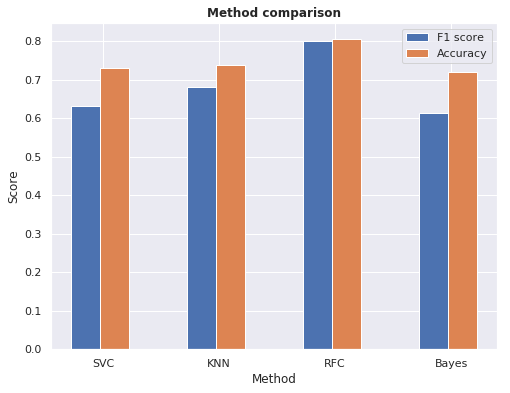

In [69]:
## Plotting F1 socres and comparison
plt.figure(figsize=(8,6))
barWidth = 0.25

algos = ["SVC", "KNN", "RFC", "Bayes"]
f1_score = [0.6323, 0.6809, 0.8007, 0.6137]
accuracies = [0.7297, 0.739, 0.8064,  0.7206]

r1 = np.arange(len(f1_score))
r2 = [x + barWidth for x in r1]

plt.bar(r1, f1_score, label='F1 score', width=barWidth, edgecolor='white')
plt.bar(r2, accuracies, label='Accuracy', width=barWidth, edgecolor='white')

plt.xlabel('Method')
plt.ylabel('Score')
plt.title('Method comparison', fontweight='bold')
plt.xticks([r + barWidth-0.1 for r in range(len(f1_score))], algos)

plt.legend()
plt.show()

In [59]:
# For printing confusion matrix
def print_confusion_matrix(confusion_matrix, class_names, figsize = (12,4), fontsize=8):
    confusion_matrix_n = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    
    df_cm_n = pd.DataFrame(
        confusion_matrix_n, index=class_names, columns=class_names, 
    )
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=figsize)
    fig.tight_layout()
    try:
        a = sns.heatmap(df_cm, annot=True, fmt = 'd', ax=ax1)
        b = sns.heatmap(df_cm_n, annot=True, fmt = '.6f', ax=ax2)
        
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    for ax in (ax1, ax2):
        ax.yaxis.set_ticklabels(ax1.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
        ax.xaxis.set_ticklabels(ax1.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    for p in (a, b):
        p.set_ylabel('True label')
        p.set_xlabel('Predicted label')
    ax1.set_title("Confusion Matrix")
    ax2.set_title("Normalized Confusion Matrix")